# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.5 opencv-python mediapipe sklearn matplotlib

     -------------------------------------- 422.6/422.6 MB 7.8 MB/s eta 0:00:00
     ------------------------------------- 462.4/462.4 kB 30.1 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 77.2 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    U

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow-gpu 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.34.1 which is incompatible.
tensorflow-gpu 2.4.1 requires h5py~=2.10.0, but you have h5py 3.1.0 which is incompatible.
tensorflow-gpu 2.4.1 requires tensorflow-estimator<2.5.0,>=2.4.0, but you have tensorflow-estimator 2.5.0 which is incompatible.


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
results

In [ ]:
draw_landmarks(frame, results)

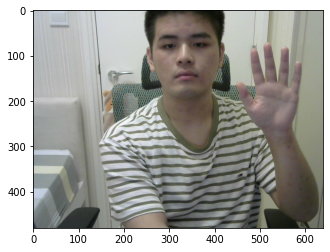

In [29]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [30]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.56683469,  0.70711106, -1.28781891, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
468*3+33*4+21*3+21*3

1662

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.56683469,  0.70711106, -1.28781891, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [22]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [24]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [25]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [27]:
label_map = {label:num for num, label in enumerate(actions)}

In [28]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [29]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [30]:
np.array(sequences).shape

(90, 30, 1662)

In [31]:
np.array(labels).shape

(90,)

In [32]:
X = np.array(sequences)

In [33]:
X.shape

(90, 30, 1662)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [55]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [56]:
res = [.7, 0.2, 0.1]

In [57]:
actions[np.argmax(res)]

'hello'

In [58]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [59]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [60]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 166ms/step - loss: 1.1157 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 135ms/step - loss: 1.0903 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 18ms/step - loss: 1.0197 - categorical_accuracy: 0.6588
Epoch 4/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.8752 - categorical_accuracy: 0.6706
Epoch 5/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.7278 - categorical_accuracy: 0.6706
Epoch 6/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.6097 - categorical_accuracy: 0.7412
Epoch 7/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.5401 - categorical_accuracy: 0.6471
Epoch 8/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.8590 - categorical_accuracy: 0.5647
Epoch 9/2000
3/3 [==============================] - 0s 19ms/step - loss: 1.6863 - categorical_accuracy: 0.3529

3/3 [==============================] - 0s 16ms/step - loss: 0.4229 - categorical_accuracy: 0.7765
Epoch 75/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.3993 - categorical_accuracy: 0.8235
Epoch 76/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.3734 - categorical_accuracy: 0.8118
Epoch 77/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.3980 - categorical_accuracy: 0.8235
Epoch 78/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.5561 - categorical_accuracy: 0.6471
Epoch 79/2000
3/3 [==============================] - 0s 19ms/step - loss: 0.4962 - categorical_accuracy: 0.6588
Epoch 80/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.4642 - categorical_accuracy: 0.6941
Epoch 81/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.4545 - categorical_accuracy: 0.6824
Epoch 82/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.4562 - categorical_accuracy: 0.6824
Epoch 

3/3 [==============================] - 0s 16ms/step - loss: 0.0998 - categorical_accuracy: 0.9647
Epoch 147/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.2641 - categorical_accuracy: 0.9059
Epoch 148/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.4886 - categorical_accuracy: 0.8235
Epoch 149/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.5922 - categorical_accuracy: 0.8000
Epoch 150/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.8013 - categorical_accuracy: 0.6706
Epoch 151/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.7072 - categorical_accuracy: 0.6588
Epoch 152/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.5098 - categorical_accuracy: 0.6824
Epoch 153/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.4598 - categorical_accuracy: 0.7765
Epoch 154/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.4560 - categorical_accuracy: 0.682

3/3 [==============================] - 0s 16ms/step - loss: 0.1727 - categorical_accuracy: 0.9647
Epoch 219/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.1912 - categorical_accuracy: 0.9176
Epoch 220/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.1286 - categorical_accuracy: 0.9647
Epoch 221/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.0846 - categorical_accuracy: 0.9882
Epoch 222/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.0825 - categorical_accuracy: 0.9765
Epoch 223/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.0770 - categorical_accuracy: 0.9882
Epoch 224/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.2481 - categorical_accuracy: 0.9059
Epoch 225/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.1495 - categorical_accuracy: 0.9529
Epoch 226/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.1678 - categorical_accuracy: 0.929

3/3 [==============================] - 0s 16ms/step - loss: 0.1101 - categorical_accuracy: 0.9647
Epoch 291/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.0865 - categorical_accuracy: 0.9647
Epoch 292/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.0470 - categorical_accuracy: 0.9882
Epoch 293/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.0421 - categorical_accuracy: 1.0000
Epoch 294/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.0328 - categorical_accuracy: 0.9882
Epoch 295/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.0383 - categorical_accuracy: 0.9882
Epoch 296/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.0498 - categorical_accuracy: 0.9765
Epoch 297/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.1227 - categorical_accuracy: 0.9647
Epoch 298/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.0689 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 16ms/step - loss: 0.2741 - categorical_accuracy: 0.8824
Epoch 363/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.0678 - categorical_accuracy: 0.9765
Epoch 364/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.1927 - categorical_accuracy: 0.8941
Epoch 365/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.0609 - categorical_accuracy: 0.9765
Epoch 366/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.1959 - categorical_accuracy: 0.9059
Epoch 367/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.0547 - categorical_accuracy: 0.9765
Epoch 368/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.1583 - categorical_accuracy: 0.9059
Epoch 369/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.0539 - categorical_accuracy: 0.9882
Epoch 370/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.1480 - categorical_accuracy: 0.929

3/3 [==============================] - 0s 106ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 437/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 438/2000
3/3 [==============================] - 0s 186ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 439/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 440/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 441/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 442/2000
3/3 [==============================] - 0s 172ms/step - loss: 0.0012 - categorical_accuracy: 1.

3/3 [==============================] - 0s 16ms/step - loss: 5.9224e-04 - categorical_accuracy: 1.0000
Epoch 505/2000
3/3 [==============================] - 0s 16ms/step - loss: 5.8780e-04 - categorical_accuracy: 1.0000
Epoch 506/2000
3/3 [==============================] - 0s 16ms/step - loss: 5.8276e-04 - categorical_accuracy: 1.0000
Epoch 507/2000
3/3 [==============================] - 0s 17ms/step - loss: 5.7783e-04 - categorical_accuracy: 1.0000
Epoch 508/2000
3/3 [==============================] - 0s 17ms/step - loss: 5.7327e-04 - categorical_accuracy: 1.0000
Epoch 509/2000
3/3 [==============================] - 0s 26ms/step - loss: 5.6813e-04 - categorical_accuracy: 1.0000
Epoch 510/2000
3/3 [==============================] - 0s 17ms/step - loss: 5.6316e-04 - categorical_accuracy: 1.0000
Epoch 511/2000
3/3 [==============================] - 0s 18ms/step - loss: 5.5818e-04 - categorical_accuracy: 1.0000
Epoch 512/2000
3/3 [==============================] - 0s 16ms/step - loss: 5.53

3/3 [==============================] - 0s 23ms/step - loss: 3.5261e-04 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 17ms/step - loss: 3.5048e-04 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 24ms/step - loss: 3.4831e-04 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 17ms/step - loss: 3.4605e-04 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 17ms/step - loss: 3.4360e-04 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 17ms/step - loss: 3.4157e-04 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 17ms/step - loss: 3.3934e-04 - categorical_accuracy: 1.0000
Epoch 581/2000
3/3 [==============================] - 0s 18ms/step - loss: 3.3718e-04 - categorical_accuracy: 1.0000
Epoch 582/2000
3/3 [==============================] - 0s 17ms/step - loss: 3.34

3/3 [==============================] - 0s 17ms/step - loss: 2.3435e-04 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 17ms/step - loss: 2.3300e-04 - categorical_accuracy: 1.0000
Epoch 646/2000
3/3 [==============================] - 0s 17ms/step - loss: 2.3180e-04 - categorical_accuracy: 1.0000
Epoch 647/2000
3/3 [==============================] - 0s 16ms/step - loss: 2.3051e-04 - categorical_accuracy: 1.0000
Epoch 648/2000
3/3 [==============================] - 0s 17ms/step - loss: 2.2897e-04 - categorical_accuracy: 1.0000
Epoch 649/2000
3/3 [==============================] - 0s 18ms/step - loss: 2.2765e-04 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 17ms/step - loss: 2.2607e-04 - categorical_accuracy: 1.0000
Epoch 651/2000
3/3 [==============================] - 0s 17ms/step - loss: 2.2462e-04 - categorical_accuracy: 1.0000
Epoch 652/2000
3/3 [==============================] - 0s 26ms/step - loss: 2.23

3/3 [==============================] - 0s 17ms/step - loss: 1.5862e-04 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 16ms/step - loss: 1.5788e-04 - categorical_accuracy: 1.0000
Epoch 716/2000
3/3 [==============================] - 0s 17ms/step - loss: 1.5711e-04 - categorical_accuracy: 1.0000
Epoch 717/2000
3/3 [==============================] - 0s 16ms/step - loss: 1.5620e-04 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 16ms/step - loss: 1.5547e-04 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 17ms/step - loss: 1.5481e-04 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 18ms/step - loss: 1.5395e-04 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 17ms/step - loss: 1.5329e-04 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 17ms/step - loss: 1.52

3/3 [==============================] - 0s 17ms/step - loss: 1.1493e-04 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 0s 19ms/step - loss: 1.1434e-04 - categorical_accuracy: 1.0000
Epoch 786/2000
3/3 [==============================] - 0s 30ms/step - loss: 1.1386e-04 - categorical_accuracy: 1.0000
Epoch 787/2000
3/3 [==============================] - 0s 17ms/step - loss: 1.1346e-04 - categorical_accuracy: 1.0000
Epoch 788/2000
3/3 [==============================] - 0s 19ms/step - loss: 1.1286e-04 - categorical_accuracy: 1.0000
Epoch 789/2000
3/3 [==============================] - 0s 32ms/step - loss: 1.1244e-04 - categorical_accuracy: 1.0000
Epoch 790/2000
1/3 [=========>....................] - ETA: 0s - loss: 1.0828e-04 - categorical_accuracy: 1.0000

KeyboardInterrupt: 

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [62]:
res = model.predict(X_test)

In [63]:
actions[np.argmax(res[4])]

'thanks'

In [64]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [65]:
model.save('action_self_trained.h5')

In [89]:
del model

In [91]:
model.load_weights('action_self_trained.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [66]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [67]:
yhat = model.predict(X_test)

In [68]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [69]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [70]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [71]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [72]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [73]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [74]:
len(sequence)

TypeError: object of type 'int' has no len()

In [75]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [76]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [77]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [78]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solut

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.sol

In [79]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)